In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def process_dataframes(dataframes):
    for df in dataframes:
        if 'value' in df.columns:
            df['value'] = df['value'].apply(lambda x: max(0, x) if x <= 1.1 else 0)
    return dataframes

def read_files_in_folder(folder):
    print(f"Reading files in folder: {folder}")
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.endswith('.csv')]
    dfs = [pd.read_csv(os.path.join(folder, file)) for file in files]
    return dfs

def plot_and_save(folder_name, dfs):
    print("Processing dataframes...")
    #dfs[2]["value"] = dfs[2].value - 0.5
    #dfs[3]["value"] = dfs[3].value - 0.5
    dfs = process_dataframes(dfs)

    print("Calculating Mean...")
    df_vals = pd.DataFrame({f'Column_{i}': df['value'] for i, df in enumerate(dfs)})
    row_mean = df_vals.mean(axis=1)
    row_std = df_vals.std(axis=1)
    print("Plotting and saving...")
    norm1 = mcolors.Normalize(vmin=np.min(row_mean), vmax=np.max(row_mean), clip=False)
    print("\t Creating Figure...")
    fig, ax1 = plt.subplots(1, 2, figsize=(12, 6))
    print("\t Updated Plot 1...")
    scatter1 = ax1[0].scatter(dfs[0]['x'], dfs[0]['y'], s=row_mean, c=row_mean, cmap='turbo', marker=',', alpha=1, norm=norm1)
    ax1[0].set_title(r'Mean')
    ax1[0].set_xticks([])
    ax1[0].set_yticks([])
    ax1[0].set_aspect('equal', adjustable='box')
    cbar1 = fig.colorbar(scatter1, ax=ax1[0], shrink=0.5)
    print("\t Updated Plot 2...")
    norm2 = mcolors.Normalize(vmin=np.min(row_std), vmax=np.max(row_std), clip=False)
    scatter2 = ax1[1].scatter(dfs[0]['x'], dfs[0]['y'], c=row_std, s=row_std, cmap='seismic', marker=',')
    ax1[1].set_title(r'Standard Deviation')
    ax1[1].set_xticks([])
    ax1[1].set_yticks([])
    ax1[1].set_aspect('equal', adjustable='box')
    cbar2 = fig.colorbar(scatter2, ax=ax1[1], shrink=0.5)
    print("\t Saving figure...")
    # Save the figure as pdf with the same name as the folder
    pdf_filename = f"{folder_name}.png"
    #plt.savefig(pdf_filename, dpi=600, bbox_inches="tight")
    print(f"Figure saved as {pdf_filename}")
    #plt.show()


In [4]:
ls

gaussian_t0/          high_t1/                        lowalpha_t4/
gaussian_t0.png       high_t1.png                     lowalpha_t4.png
get_box_plot.ipynb    lowalpha_t1/                    matern_t3/
get_mean_std_plot.py  lowalpha_t1_crash_appendix.png  matern_t3.png
high_t0/              lowalpha_t3/                    matern_t4/
high_t0.png           lowalpha_t3.png                 matern_t4.png


In [28]:
dfs = read_files_in_folder("matern_t4")
dfs2 = read_files_in_folder("lowalpha_t4")
dfs3 = read_files_in_folder("high_t1")

Reading files in folder: matern_t4
Reading files in folder: lowalpha_t4
Reading files in folder: high_t1


<AxesSubplot:ylabel='value'>

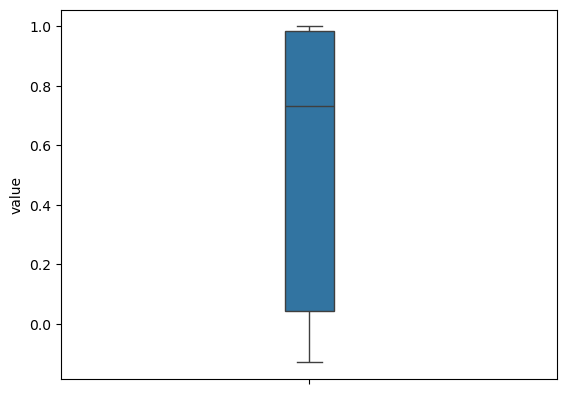

In [19]:
sns.boxplot(dfs[0]["value"], width=0.1)

/tmp/ipykernel_564439/1699394135.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dfs[1]["value"], fill=True, palette="Set2")
/tmp/ipykernel_564439/1699394135.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dfs2[1]["value"], fill=True, palette="Set2")
/tmp/ipykernel_564439/1699394135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dfs3[1]["value"], fill=True, palette="Set2")


<AxesSubplot:xlabel='value', ylabel='Density'>

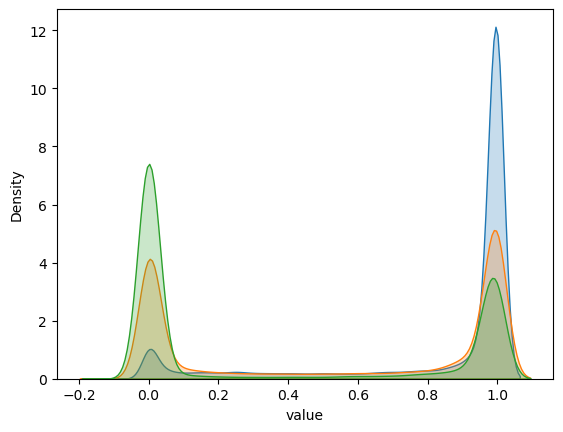

In [30]:
sns.kdeplot(data=dfs[1]["value"], fill=True, palette="Set2")
sns.kdeplot(data=dfs2[1]["value"], fill=True, palette="Set2")
sns.kdeplot(data=dfs3[1]["value"], fill=True, palette="Set2")